In [30]:
import numpy as np
import os
import pandas as pd

from pathlib import Path

import matplotlib.pyplot as plt

In [31]:
log_dir = Path("../motor_logs/")
day_path = log_dir / "December_11"

for file in os.listdir(day_path):
    if file.endswith(".csv"):
        file_path = day_path / file
        with open(file_path, 'r') as f:
            lines = f.readlines()
            if len(lines) == 1 and lines[0].strip() == 'time,position,velocity,torque':
                os.remove(file_path)

sorted_paths = sorted(os.listdir(day_path), key=lambda x: x.split("_")[3], reverse=True)

for path in sorted_paths:
    print(path)


AK60-6_sit_to_stand_12-11-11-06-54.csv
AK60-6_sit_to_stand_12-11-11-12-46.csv
AK70-10_sit_to_stand_12-11-11-54-41.csv
AK70-10_sit_to_stand_12-11-11-50-36.csv
AK70-10_sit_to_stand_12-11-10-54-31.csv
AK70-10_sit_to_stand_12-11-11-06-54.csv
AK60-6_sit_to_stand_12-11-10-54-31.csv
AK60-6_sit_to_stand_12-11-11-50-36.csv
AK70-10_sit_to_stand_12-11-11-12-46.csv
AK60-6_sit_to_stand_12-11-11-54-41.csv
sit_to_stand_12-11-11-57-18.csv
sit_to_stand_12-11-11-54-41.csv
sit_to_stand_12-11-11-53-57.csv
sit_to_stand_12-11-11-50-36.csv
sit_to_stand_12-11-11-12-46.csv
sit_to_stand_12-11-11-10-19.csv
sit_to_stand_12-11-11-06-55.csv
sit_to_stand_12-11-10-58-25.csv
sit_to_stand_12-11-10-54-50.csv
sit_to_stand_12-11-10-46-04.csv


In [38]:
test_time_1 = "sit_to_stand_12-11-11-12-46.csv"
task_df = "sit_to_stand_12-11-11-57-18.csv"
test_time_2 = test_time_1
# test_time_2 = "measure_arm_pose_12-07-09-49-57.csv"

base_motor_log = day_path / f"AK70-10_{test_time_1}"
elbow_motor_log = day_path / f"AK60-6_{test_time_2}"
task_log = day_path / task_df

In [39]:
base_motor_df = pd.read_csv(base_motor_log, index_col='time')
elbow_motor_df = pd.read_csv(elbow_motor_log, index_col='time')
task_df = pd.read_csv(task_log, index_col='time')

Text(0.5, 0, 'time')

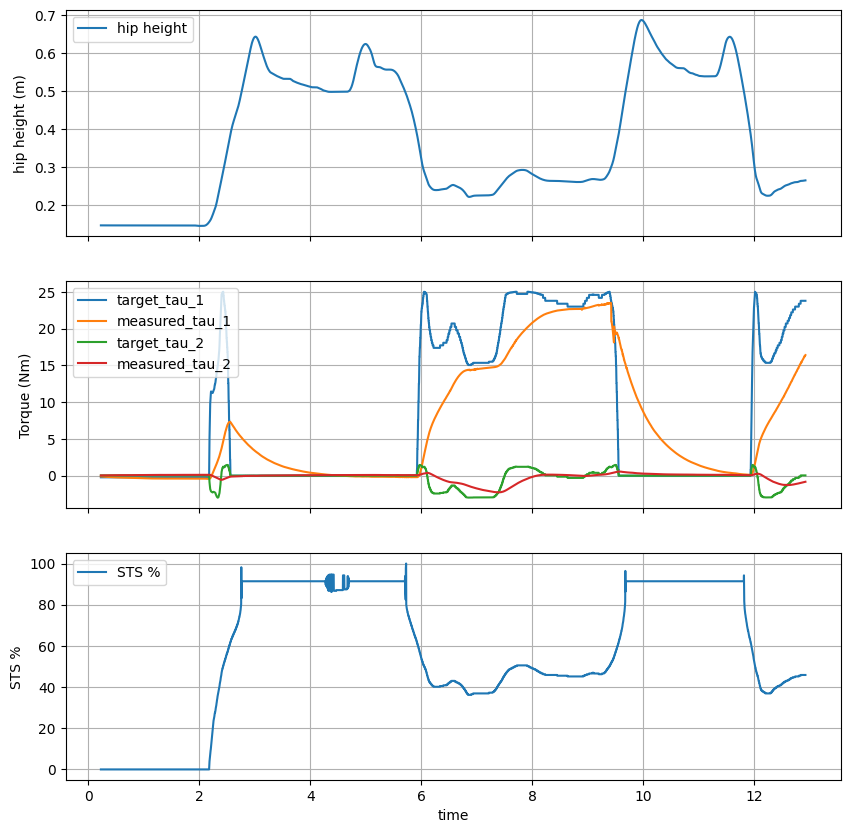

In [41]:
fig, ax = plt.subplots(3, 1, sharex=True, figsize=(10, 10))
ax[0].plot(task_df.index[50:], -task_df["EE_X"].iloc[50:], label="hip height")
ax[0].grid()
ax[0].legend()
ax[0].set_ylabel("hip height (m)")


ax[1].plot(task_df.index[50:], task_df["target_tau_1"].iloc[50:], label="target_tau_1")
ax[1].plot(task_df.index[50:], task_df["measured_tau_1"].iloc[50:], label="measured_tau_1")
ax[1].plot(task_df.index[50:], task_df["target_tau_2"].iloc[50:], label="target_tau_2")
ax[1].plot(task_df.index[50:], task_df["measured_tau_2"].iloc[50:], label="measured_tau_2")
ax[1].grid()
ax[1].legend()
ax[1].set_ylabel("Torque (Nm)")

ax[2].plot(task_df.index[50:], task_df["index"].iloc[50:], label="STS %")
ax[2].grid()
ax[2].legend()
ax[2].set_ylabel("STS %")
ax[2].set_xlabel('time')

In [35]:
min_len = min(len(base_motor_df), len(elbow_motor_df))

base_motor_df = base_motor_df.iloc[:min_len]
elbow_motor_df = elbow_motor_df.iloc[:min_len]

In [36]:
l1 = 0.44
l2 = 0.41

theta_1 = base_motor_df["position"].values
theta_2 = elbow_motor_df["position"].values

P_EE = np.array([l1*np.cos(theta_1) + l2*np.cos(theta_1 + theta_2), l1*np.sin(theta_1) + l2*np.sin(theta_1 + theta_2)])

hip_proxy = pd.DataFrame.from_dict({"time": base_motor_df.index, "x": P_EE[0, :], "y": P_EE[1, :]})

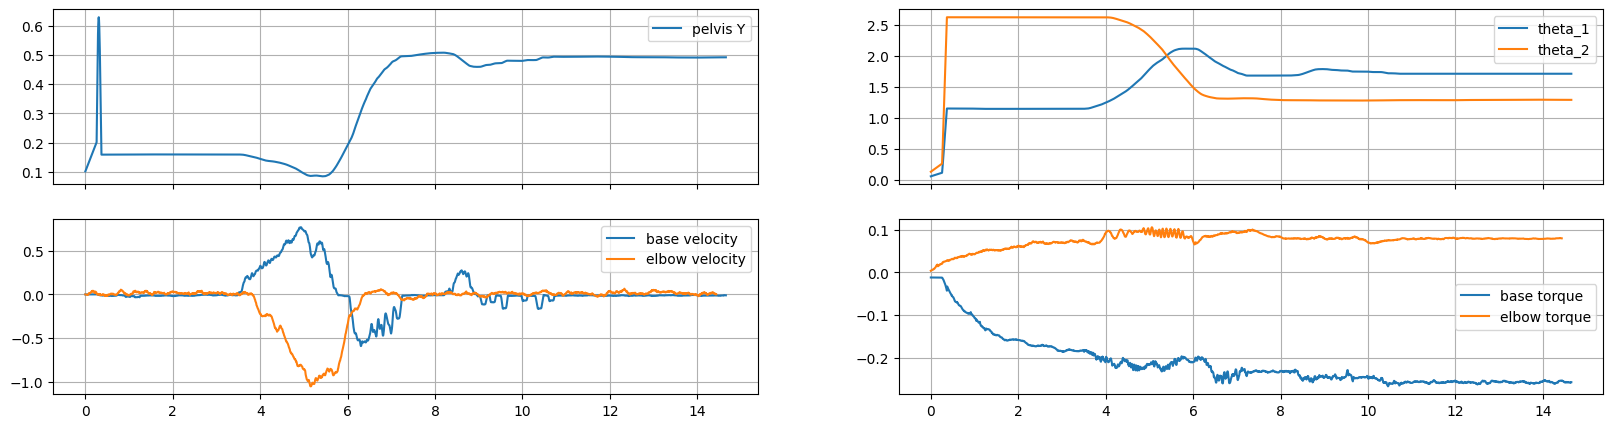

In [37]:
fig, axs = plt.subplots(2, 2, sharex=True, figsize=(20, 5))

axs[0, 0].plot(base_motor_df.index, hip_proxy.y, label="pelvis Y")
axs[0, 0].grid()
axs[0, 0].legend()

axs[0, 1].plot(base_motor_df.index, theta_1, label="theta_1")
axs[0, 1].plot(base_motor_df.index, theta_2, label="theta_2")
axs[0, 1].grid()
axs[0, 1].legend()

axs[1, 0].plot(base_motor_df.index, base_motor_df.velocity, label="base velocity")
axs[1, 0].plot(elbow_motor_df.index, elbow_motor_df.velocity, label="elbow velocity")
axs[1, 0].grid()
axs[1, 0].legend()

axs[1, 1].plot(base_motor_df.index, base_motor_df.torque, label="base torque")
axs[1, 1].plot(elbow_motor_df.index, elbow_motor_df.torque, label="elbow torque")
axs[1, 1].grid()
axs[1, 1].legend()